In [ ]:
##LOAD PACKAGES##
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv('/content/drive/My Drive/House Sales in King County/kc_house_data.csv')

In [ ]:
print(data.shape)
data.head(20)

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


#Limpeza de dados

In [ ]:
#Verificar valores faltantes
data.apply(lambda x: sum(x.isnull()))

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


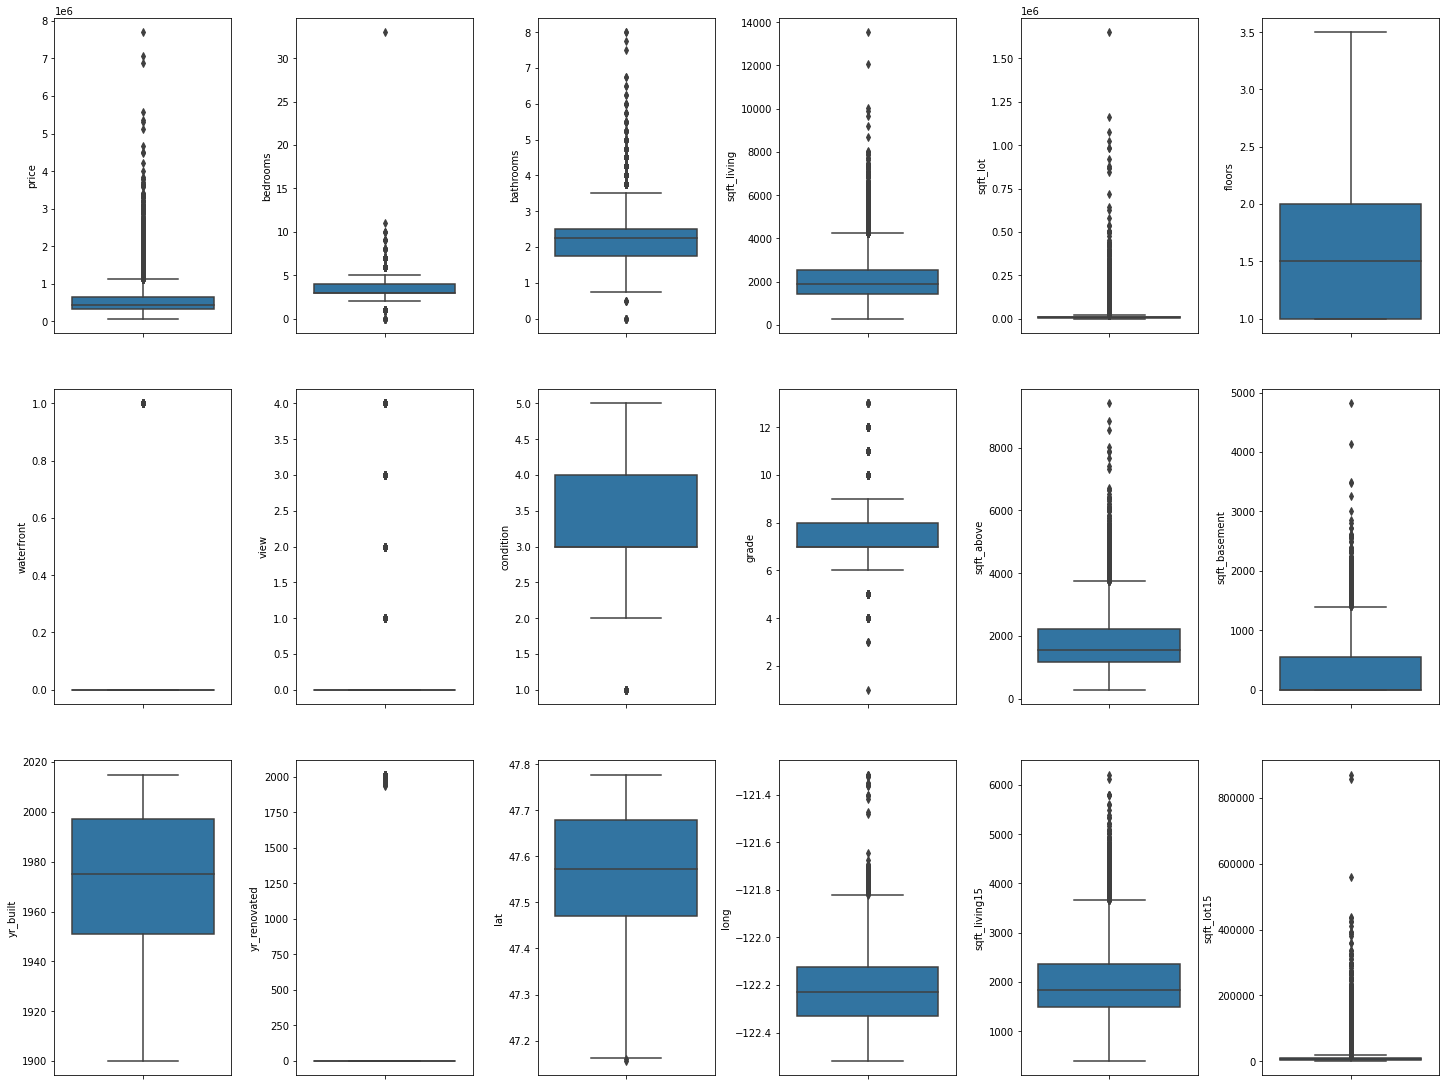

In [ ]:
fig, axs = plt.subplots(ncols=6, nrows=3, figsize=(20, 15))
index = 0
axs = axs.flatten()
for k,v in data.drop(['id', 'date', 'zipcode'], axis=1).items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

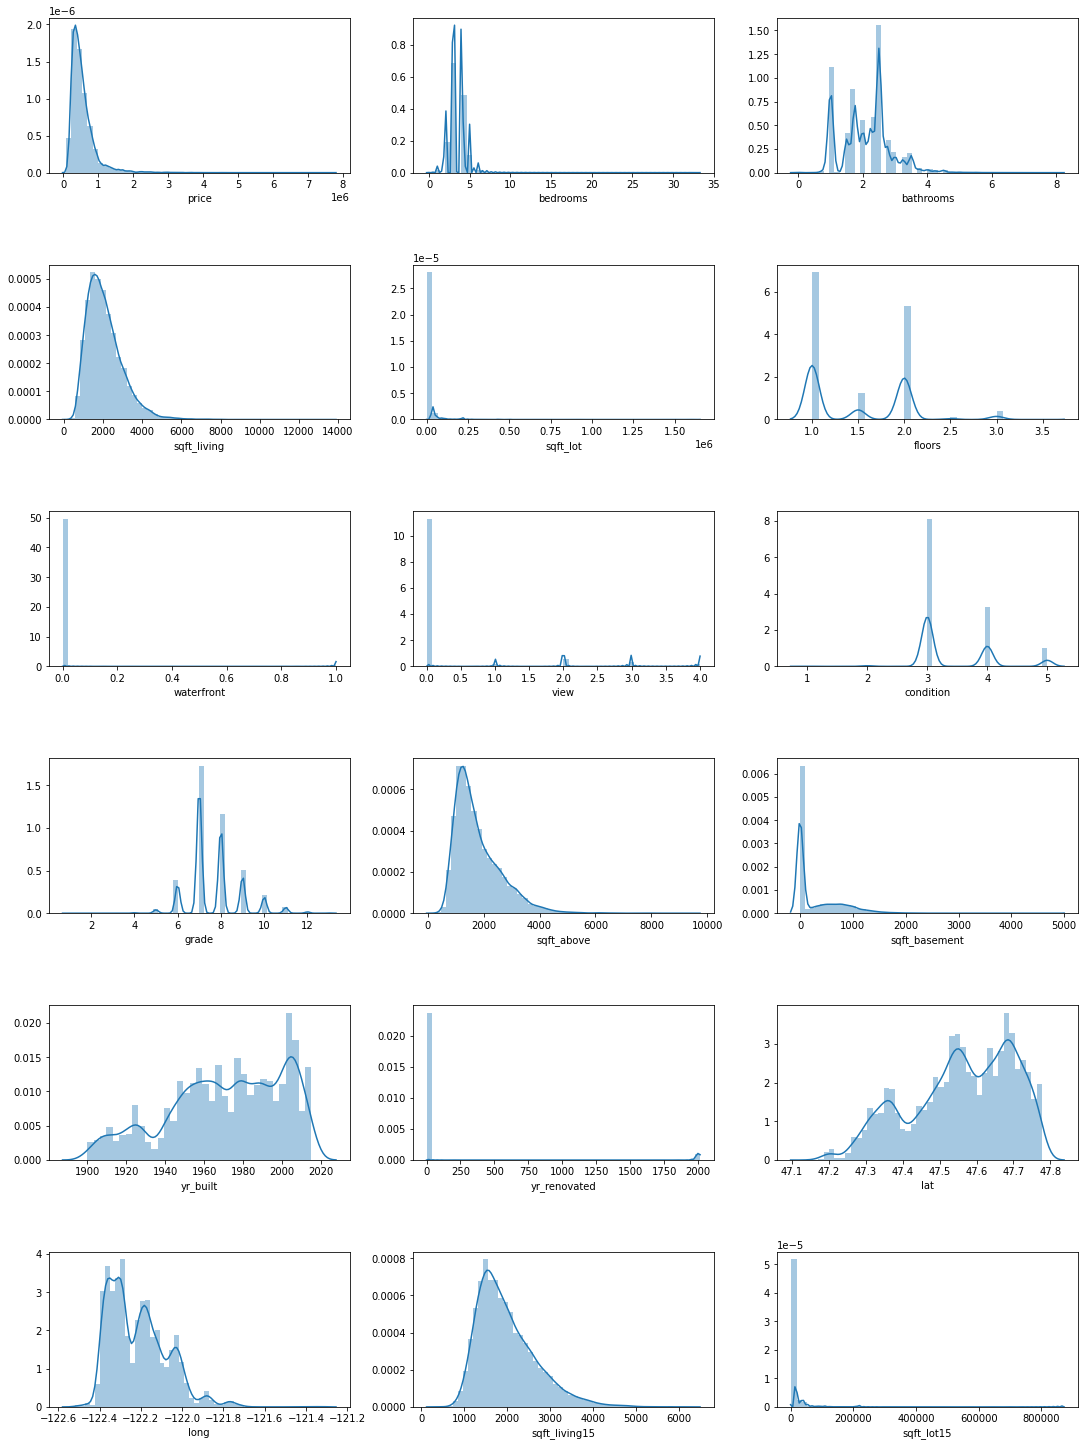

In [ ]:
fig, axs = plt.subplots(ncols=3, nrows=6, figsize=(15, 20))
index = 0
axs = axs.flatten()
for k,v in data.drop(['id', 'date', 'zipcode'], axis=1).items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)



*   Existem certas datas em que os preços são maiores? Qual seria esse periodo?
*   Casas no centro são mais caras? Em qual localização?
*   O ano de construção da casa altera o preço se ela estiver em boas condições?
*   Casa com mais quartos são mais caras? O quanto são mais caras? Compensa fazer reforma aumentando o número de quartos?
*   Casa com mais banheiros são mais caras? O quanto são mais caras? Compensa fazer reforma aumentado o número de banheiros?
*   Casa com mais andares são mais valorizadas?
*   Qual possui influencia mais no preço, um maior lote ou uma aréa maior de interior da casa?
*   Onde estão os lugares com a melhor visão? A visão da casa importa?
*   Há uma direfença grande nos preços para notas diferentes?
*   Casas com vista para o mar são valorizadas?
*   Csas recem renovadas valem mais? Valeria a pena fazer a renovação antes de 
vende-la?


#Análise Exploratória


##Date

In [ ]:
#Create variables to facilitate analysis
data['date_year'] = data['date'].apply(lambda x: x[0:4])
data['date_month'] = data['date'].apply(lambda x: x[4:6])
data['date_day'] = data['date'].apply(lambda x: x[6:8])

In [ ]:
data['date_month'].value_counts()

05    2414
04    2231
07    2211
06    2180
08    1940
10    1878
03    1875
09    1774
12    1471
11    1411
02    1250
01     978
Name: date_month, dtype: int64

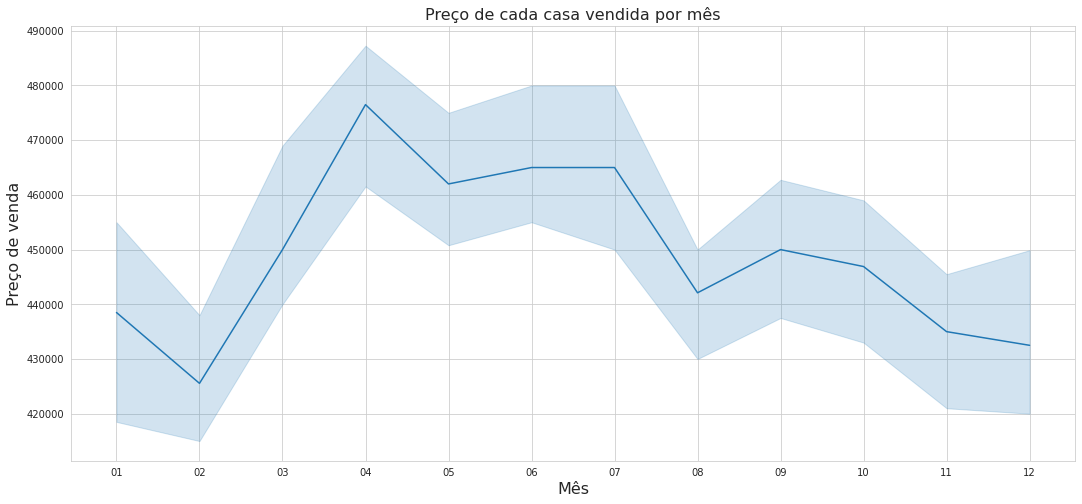

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(18, 8))
ax = sns.lineplot(data=data, x='date_month', y='price', estimator=np.median, markers = True)
ax.set_title('Preço de cada casa vendida por mês', fontsize=16)
ax.set_xlabel("Mês", fontsize=16)
ax.set_ylabel("Preço de venda", fontsize=16)
plt.show()

A uma variação de preços relevante, o que indica que há períodos onde é melhor comprar e outros onde é melhor vender.

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month',
       'date_day'],
      dtype='object')

##Zipcode

In [ ]:
data.groupby('zipcode')['price'].median().sort_values(ascending=False).head(20)

zipcode
98039    1892500.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
98006     760184.5
98119     744975.0
98075     739999.0
98109     736000.0
98102     720000.0
98199     689800.0
98033     678350.0
98105     675000.0
98077     652475.0
98074     642000.0
98053     635000.0
98052     615000.0
98029     575000.0
98122     572000.0
98027     570500.0
Name: price, dtype: float64

In [ ]:
data.groupby('zipcode')['price'].median().describe()

count    7.000000e+01
mean     5.010821e+05
std      2.551843e+05
min      2.350000e+05
25%      3.200000e+05
50%      4.479750e+05
75%      5.742500e+05
max      1.892500e+06
Name: price, dtype: float64

Regiões perto do centro tem um preço maior, e a mediana dos preços das regiões está em torno de 450 mil. Uma outra pergunta é há possibilidade de comprar casas nessas regiôes por um bom preço.

In [ ]:
def plot_zipcode(n):
  price = data.query(f"zipcode=={n}")["price"]
  price.plot(kind='hist', bins=20)
  plt.show()
  print('\n')
  price.plot.box()
  plt.show()
  return price.describe()

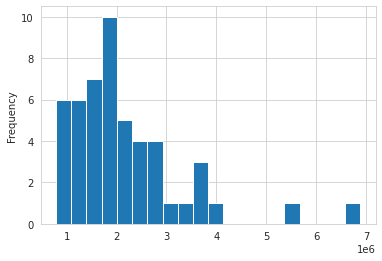

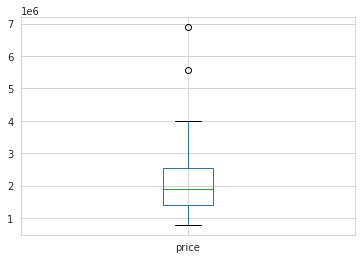

count    5.000000e+01
mean     2.160607e+06
std      1.166477e+06
min      7.875000e+05
25%      1.401000e+06
50%      1.892500e+06
75%      2.556250e+06
max      6.885000e+06
Name: price, dtype: float64

In [ ]:
plot_zipcode(98039)

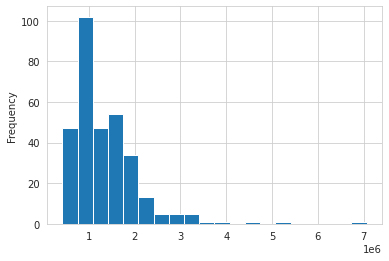

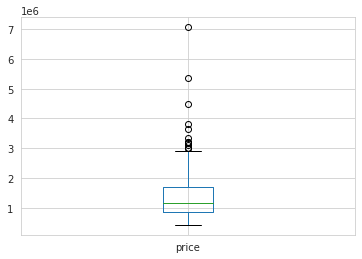

count    3.170000e+02
mean     1.355927e+06
std      7.458201e+05
min      4.250000e+05
25%      8.450000e+05
50%      1.150000e+06
75%      1.691000e+06
max      7.062500e+06
Name: price, dtype: float64

In [ ]:
plot_zipcode(98004)

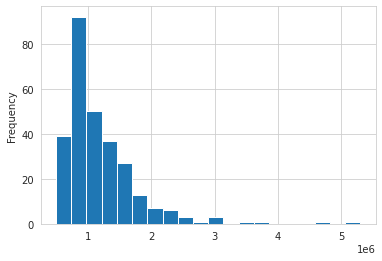

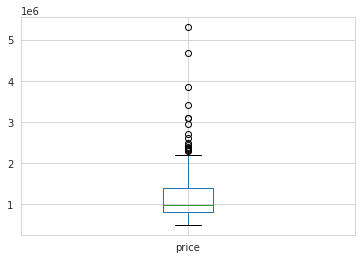

count    2.820000e+02
mean     1.194230e+06
std      6.074935e+05
min      5.000000e+05
25%      8.220000e+05
50%      9.937500e+05
75%      1.385500e+06
max      5.300000e+06
Name: price, dtype: float64

In [ ]:
plot_zipcode(98040)

Mesmo a maioria das casa sendo de um preço elevado, da para encontrar casas com bons preços nesses lugares.

##Ano de construção

In [ ]:
data['date_month'] = pd.to_numeric(data['date_month'])

In [ ]:
data.groupby('yr_built')['price'].median().sort_values(ascending=False).head(10)

yr_built
2015    629500.0
1902    624000.0
1911    606000.0
1927    605000.0
2014    599000.0
1905    597500.0
1907    595000.0
2001    585000.0
1909    575500.0
2013    565000.0
Name: price, dtype: float64

O que faz uma casa de 1902 ter preços parecidos com uma casa de 2015?

In [ ]:
data.query('yr_built==1902 and date_month == 8')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
4481,7600057,20140805T000000,520000.0,3,2.0,1410,2700,2.0,0,0,4,7,1410,0,1902,0,98122,47.6029,-122.302,1750,4000,2014,8,05
16129,4232400010,20140804T000000,780500.0,5,1.0,1760,4264,2.0,0,0,3,8,1760,0,1902,0,98112,47.6246,-122.312,2130,4264,2014,8,04


In [ ]:
data.query('yr_built == 2015 and date_month == 8')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
14489,2770601530,20140826T000000,500000.0,2,2.25,1570,1269,2.0,0,0,3,9,1280,290,2015,0,98199,47.6514,-122.385,1570,6000,2014,8,26
19805,9126100765,20140801T000000,455000.0,3,1.75,1320,1014,3.0,0,0,3,9,1320,0,2015,0,98122,47.6047,-122.305,1380,1495,2014,8,01
20770,9310300160,20140828T000000,357000.0,5,2.50,2990,9240,2.0,0,0,3,8,2990,0,2015,0,98133,47.7384,-122.348,1970,18110,2014,8,28


In [ ]:
print('1902')
data.loc[4481]

1902


id                       7600057
date             20140805T000000
price                     520000
bedrooms                       3
bathrooms                      2
sqft_living                 1410
sqft_lot                    2700
floors                         2
waterfront                     0
view                           0
condition                      4
grade                          7
sqft_above                  1410
sqft_basement                  0
yr_built                    1902
yr_renovated                   0
zipcode                    98122
lat                      47.6029
long                    -122.302
sqft_living15               1750
sqft_lot15                  4000
date_year                   2014
date_month                     8
date_day                      05
Name: 4481, dtype: object

In [ ]:
print('2015')
data.loc[14489]

2015


id                    2770601530
date             20140826T000000
price                     500000
bedrooms                       2
bathrooms                   2.25
sqft_living                 1570
sqft_lot                    1269
floors                         2
waterfront                     0
view                           0
condition                      3
grade                          9
sqft_above                  1280
sqft_basement                290
yr_built                    2015
yr_renovated                   0
zipcode                    98199
lat                      47.6514
long                    -122.385
sqft_living15               1570
sqft_lot15                  6000
date_year                   2014
date_month                     8
date_day                      26
Name: 14489, dtype: object

A diferença parece se dar pela localização, pois a casa de 1902 está localizada no centro, e também está em melhores condições. Assim, o ano de construção da casa não parece fazer diferença.

##Número de quartos

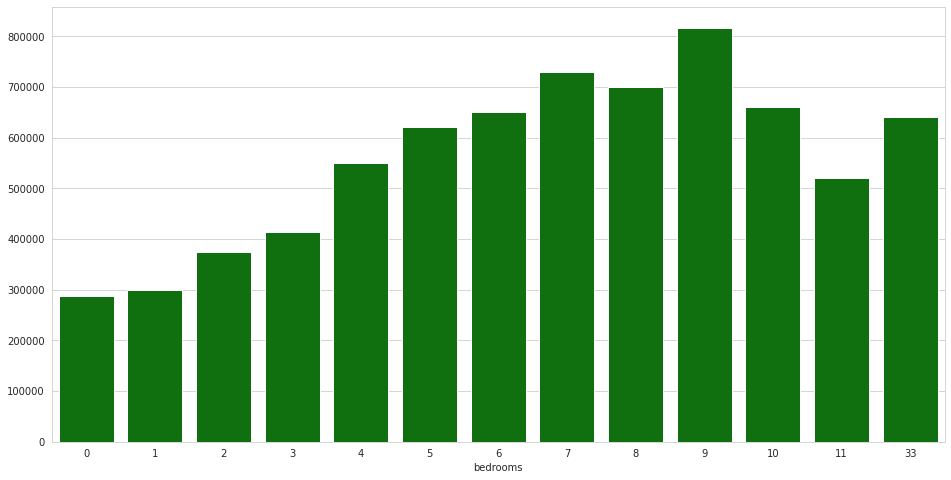

In [ ]:
sns.set_style("whitegrid")

price_for_bedrooms = data.groupby('bedrooms')['price'].median()
plt.figure(figsize=(16,8))
sns.barplot(x=price_for_bedrooms.index,
            y=price_for_bedrooms.values, 
            color='green')
plt.show()

Quanto mais quartos, mais cara a casa é, mas depois de 7 quartos o valor começa a diminuir. Então seria bom fazer reformas adicionando mais quartos, mais acima de 7 é desnecessário.

##Número de banheiros

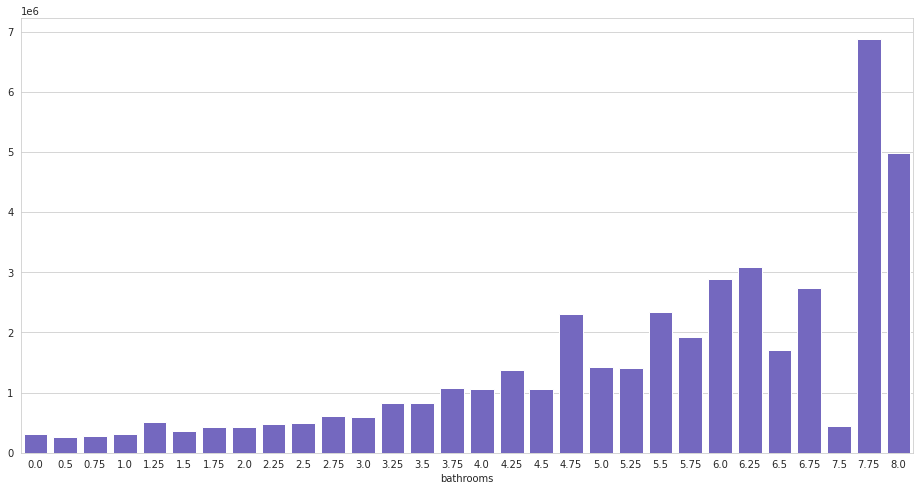

In [ ]:
sns.set_style("whitegrid")

price_for_bathrooms = data.groupby('bathrooms')['price'].median()
plt.figure(figsize=(16,8))
ax = sns.barplot(x=price_for_bathrooms.index,
            y=price_for_bathrooms.values, 
            color='slateblue')

plt.show()

In [ ]:
price_for_bathrooms

bathrooms
0.00     317500.0
0.50     264000.0
0.75     273500.0
1.00     320000.0
1.25     516500.0
1.50     370000.0
1.75     422900.0
2.00     423250.0
2.25     472500.0
2.50     499950.0
2.75     605000.0
3.00     600000.0
3.25     835000.0
3.50     820000.0
3.75    1070000.0
4.00    1056250.0
4.25    1380000.0
4.50    1061500.0
4.75    2300000.0
5.00    1425000.0
5.25    1415000.0
5.50    2337500.0
5.75    1930000.0
6.00    2892500.0
6.25    3094000.0
6.50    1709445.0
6.75    2734000.0
7.50     450000.0
7.75    6885000.0
8.00    4990000.0
Name: price, dtype: float64

In [ ]:
data['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
8.00       2
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

##Andares

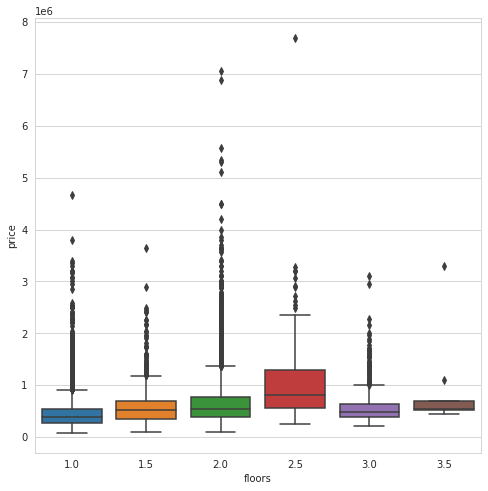

In [ ]:
ax = plt.figure(figsize=(8,8)).gca() # define axis
sns.boxplot(x = 'floors', y = 'price', data = data, ax = ax)

Há um aumento de preço dependendo do número de andares, mas não aumenta muito.

##Area interna e lote

In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'date_year', 'date_month',
       'date_day'],
      dtype='object')

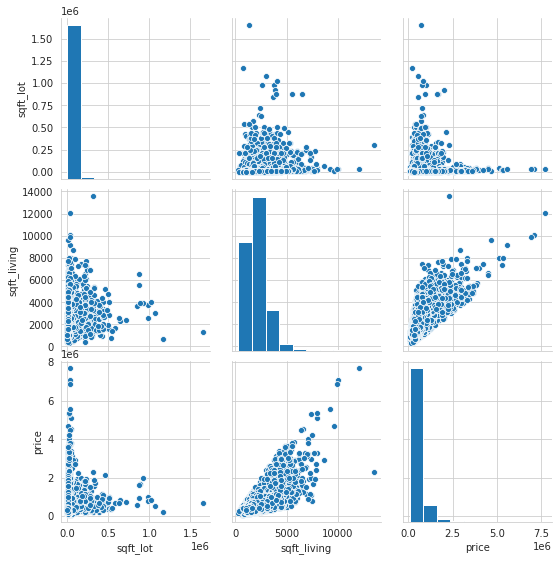

In [ ]:
sns.pairplot(data = data[["sqft_lot", "sqft_living", "price"]])

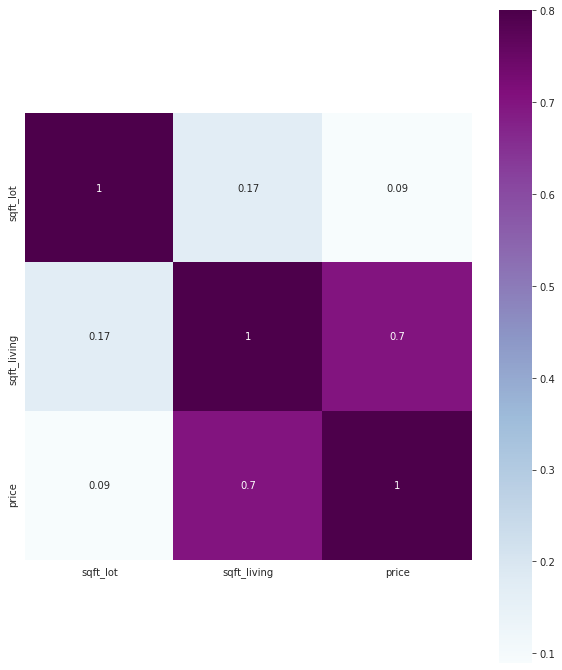

In [ ]:
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(data[["sqft_lot", "sqft_living", "price"]].corr(), vmax=.8, square=True, cmap="BuPu",annot=True);

Devido a alta correlação entre o tamanho do interior da casa e o preço, o tamanho do lote não é tão relevante no preço.

##Vista da casa

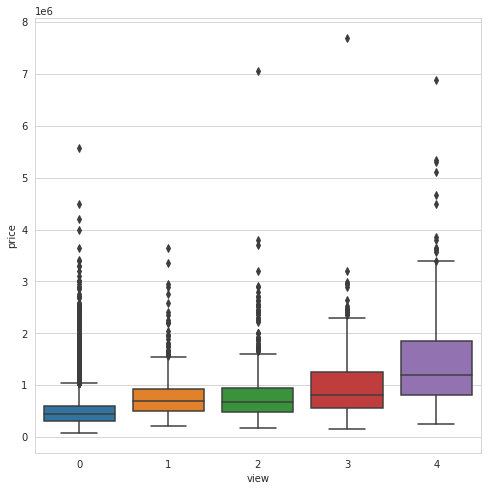

In [ ]:
ax = plt.figure(figsize=(8,8)).gca() # define axis
sns.boxplot(x = 'view', y = 'price', data = data, ax = ax)

A vista é bem relevante compesa ter casas com boa vista.

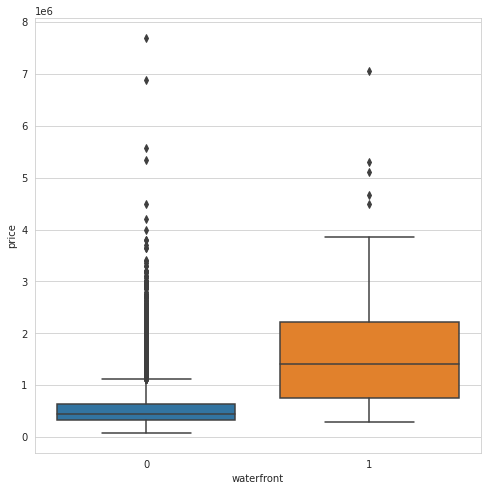

In [ ]:
ax = plt.figure(figsize=(8,8)).gca() # define axis
sns.boxplot(x = 'waterfront', y = 'price', data = data, ax = ax)

In [ ]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

Mesmo com um número pequeno de dados para casas na beira mar, a diferença é muito grande para se desconsiderar.

##Nota da casa

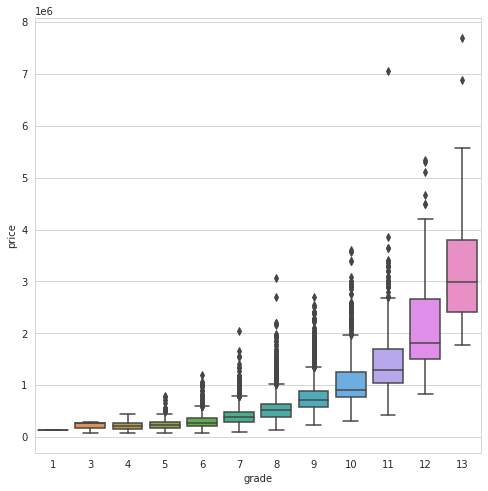

In [ ]:
ax = plt.figure(figsize=(8,8)).gca() # define axis
sns.boxplot(x = 'grade', y = 'price', data = data, ax = ax)

A nota da casa eleva muito o preço.

##Renovação

In [ ]:
data.query('yr_renovated >= 2005')['price'].describe()

count    3.200000e+02
mean     7.580613e+05
std      5.264382e+05
min      1.100000e+05
25%      4.137500e+05
50%      6.502500e+05
75%      9.087500e+05
max      4.668000e+06
Name: price, dtype: float64

In [ ]:
data.query('yr_renovated != 0')['price'].describe()

count    9.140000e+02
mean     7.603790e+05
std      6.077348e+05
min      1.100000e+05
25%      4.012500e+05
50%      6.000000e+05
75%      9.000000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
data.query('yr_renovated == 0')['price'].describe()

count    2.069900e+04
mean     5.303608e+05
std      3.495780e+05
min      7.500000e+04
25%      3.200000e+05
50%      4.480000e+05
75%      6.344000e+05
max      6.885000e+06
Name: price, dtype: float64

In [ ]:
data.query('yr_renovated != 0')['price'].median() - data.query('yr_renovated == 0')['price'].median()

152000.0

In [ ]:
data.query('yr_renovated >= 2005')['price'].median() - data.query('yr_renovated == 0')['price'].median()

202250.0

Renovação é uma otíma maneira de valorizar a casa e vende-la por preços mais altos.

#Solução

A House rockect deveria comprar casas próximas ao centro de seattle e regiões em Medina e proximo a essar região em Bellevue. Com os dados é possível ver os locais mais valorizados e comprar casas com bons preços nesses lugares, ou seja, casas com valores inferior as encontradas nesses locais, pois mesmo que o preço médio seja elevado, ainda é possível encontrar casas com bons preços. Isso é possível visualizar no gráfico abaixo de uma das regiôes mais valorizadas.

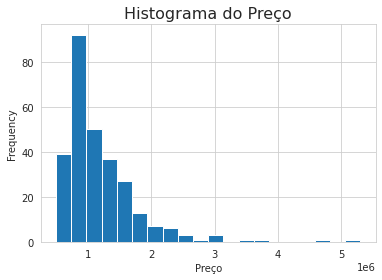

In [ ]:
price = data.query("zipcode==98040")["price"]
ax = price.plot(kind='hist', bins=20)
ax.set_title('Histograma do Preço', fontsize=16)
ax.set_xlabel("Preço", fontsize=10)
plt.show()

In [ ]:
data.loc[[3693, 1763, 95, 334]]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_year,date_month,date_day
3693,5021900265,20140702T000000,659000.0,4,2.0,2090,10800,1.0,0,0,4,7,2090,0,1951,0,98040,47.5759,-122.223,2090,10800,2014,7,02
1763,1832100030,20140625T000000,597326.0,4,4.0,3570,8250,2.0,0,0,3,10,2860,710,2015,0,98040,47.5784,-122.226,2230,10000,2014,6,25
95,1483300570,20140908T000000,905000.0,4,2.5,3300,10250,1.0,0,0,3,7,2390,910,1946,1991,98040,47.5873,-122.249,1950,6045,2014,9,08
334,191100045,20140703T000000,940000.0,4,2.0,2490,9525,2.0,0,0,5,9,2490,0,1968,0,98040,47.5639,-122.217,2770,9525,2014,7,03


Então, deve-se comprar casas abaixo do preço médio e que possam fazer renovação ou reforma.

 A renovação da casa é um fator que deve ser levado em consideração, pois a diferença é grande entre fazer ou não renovação a diferença na mediana é de 152000.0 e considerando a diferença entre as casa que tiveram renovação depois de 2005 e as sem renovação a difereça é de 202250.0 o que indica que é bom considerar a renovação da casa para poder lucrar mais.
Fazer reforma é uma boa opção, aumentar o número de quartos aumenta o preço da casa,e a diferença faz valer o investimento.

In [ ]:
anterior = 288000
x=0
for i in price_for_bedrooms:
  if i > 288000:
    print(f'Diferença entre {x} e {x+1} quartos é igual a {i-anterior}')
    anterior = i
    x+=1

Diferença entre 0 e 1 quartos é igual a 11000.0
Diferença entre 1 e 2 quartos é igual a 75000.0
Diferença entre 2 e 3 quartos é igual a 39000.0
Diferença entre 3 e 4 quartos é igual a 136997.5
Diferença entre 4 e 5 quartos é igual a 70002.5
Diferença entre 5 e 6 quartos é igual a 30000.0
Diferença entre 6 e 7 quartos é igual a 78580.0
Diferença entre 7 e 8 quartos é igual a -28580.0
Diferença entre 8 e 9 quartos é igual a 117000.0
Diferença entre 9 e 10 quartos é igual a -157000.0
Diferença entre 10 e 11 quartos é igual a -140000.0
Diferença entre 11 e 12 quartos é igual a 120000.0


A reforma com adição de baheiros também aumento aumenta o preço, por isso deve se fazer orçamento e verificar se háverá lucro.

In [ ]:
anterior = 317500
x=0
for i in price_for_bathrooms:
  if i != 317500:
    print(f'Diferença entre {x} e {0.5 if x == 0 else x+0.25} banheiros é igual a {i-anterior}')
    anterior = i
    if x == 0:
      x+=0.5
    else:
      x+=0.25

Diferença entre 0 e 0.5 banheiros é igual a -53500.0
Diferença entre 0.5 e 0.75 banheiros é igual a 9500.0
Diferença entre 0.75 e 1.0 banheiros é igual a 46500.0
Diferença entre 1.0 e 1.25 banheiros é igual a 196500.0
Diferença entre 1.25 e 1.5 banheiros é igual a -146500.0
Diferença entre 1.5 e 1.75 banheiros é igual a 52900.0
Diferença entre 1.75 e 2.0 banheiros é igual a 350.0
Diferença entre 2.0 e 2.25 banheiros é igual a 49250.0
Diferença entre 2.25 e 2.5 banheiros é igual a 27450.0
Diferença entre 2.5 e 2.75 banheiros é igual a 105050.0
Diferença entre 2.75 e 3.0 banheiros é igual a -5000.0
Diferença entre 3.0 e 3.25 banheiros é igual a 235000.0
Diferença entre 3.25 e 3.5 banheiros é igual a -15000.0
Diferença entre 3.5 e 3.75 banheiros é igual a 250000.0
Diferença entre 3.75 e 4.0 banheiros é igual a -13750.0
Diferença entre 4.0 e 4.25 banheiros é igual a 323750.0
Diferença entre 4.25 e 4.5 banheiros é igual a -318500.0
Diferença entre 4.5 e 4.75 banheiros é igual a 1238500.0
Di

Como foi visto em outra parte desse notebook, há meses do ano onde é melhor comprar e outros onde é melhor vender. Emtão, sugiro que se concentrem mais em comprar em meses próximos ao fim de ano e começo do ano, devido aos preços baixos. A partir do mês 3 até o mês nove, os preços estão mais altos, por isso é um ótimo momento para fazer vendas.

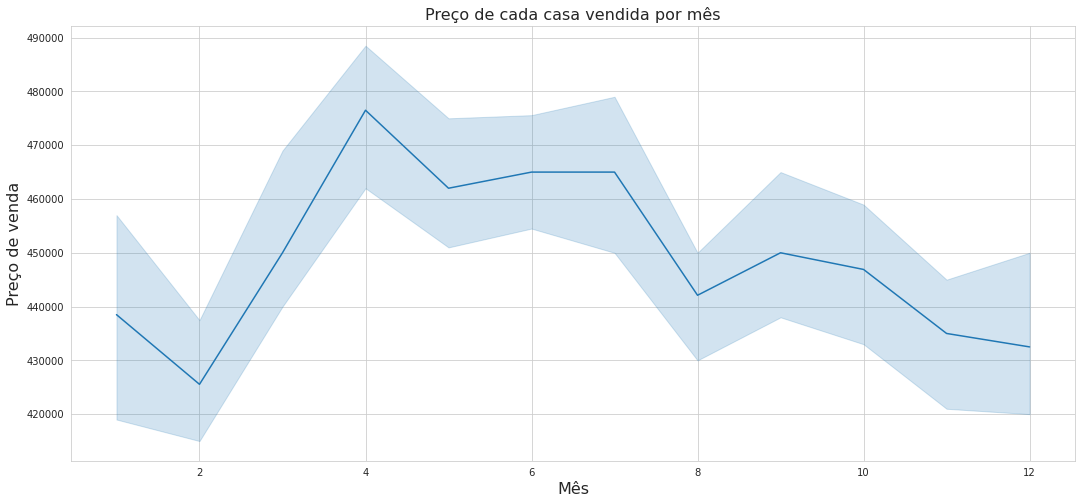

In [ ]:
sns.set_style("whitegrid")

plt.figure(figsize=(18, 8))
ax = sns.lineplot(data=data, x='date_month', y='price', estimator=np.median, markers = True)
ax.set_title('Preço de cada casa vendida por mês', fontsize=16)
ax.set_xlabel("Mês", fontsize=16)
ax.set_ylabel("Preço de venda", fontsize=16)
plt.show()

Elas poderiam ser vendidas pelo preço de compra acresentado o aumento do preço das em determinado mês e o aumento de preço com as reformas e renovação.
